In [46]:
import pandas as pd
import nltk

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels
%matplotlib inline

In [209]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
mesh = pd.read_csv('mesh_thesaurus.txt', sep='|')
terms = mesh['MESH_TERM']

In [130]:
conditions = pd.read_csv('conditions.txt', sep='|')
conditions.head()

,CONDITION_ID,NCT_ID,CONDITION
0,150,NCT00000262,Substance-Related Disorders
1,151,NCT00000263,Opioid-Related Disorders
2,152,NCT00000263,Substance-Related Disorders
3,153,NCT00000264,Opioid-Related Disorders
4,154,NCT00000264,Substance-Related Disorders


In [132]:
#categories = conditions[conditions['len(condition)'] < 50]

In [133]:
categories['split descript'] = [len(x.split()) for x in categories['CONDITION']]
categories.head()

,CONDITION_ID,NCT_ID,CONDITION,len(condition),split descript
0,150,NCT00000262,Substance-Related Disorders,27,2
1,151,NCT00000263,Opioid-Related Disorders,24,2
2,152,NCT00000263,Substance-Related Disorders,27,2
3,153,NCT00000264,Opioid-Related Disorders,24,2
4,154,NCT00000264,Substance-Related Disorders,27,2


In [53]:
def word_counter(colname):
    """ Helper for aggregating names"""
    word_count = dict()
    for row in colname:
        for x in row.split():
            if x in word_count:
                word_count[x] += 1
            elif x not in word_count:
                word_count[x] = 1
    return word_count

In [54]:
def create_plottable_df(source_df, colname, skipwords):
    """
    Reusable method for EDA.
    :param: colname (str)
    :param: skipwords (list of str)
    :return: dataframe
    """
    word_count = word_counter(source_df[colname])
    wc_list = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)
    df = pd.DataFrame(wc_list, columns=[colname, 'count'])
    df['drop_these'] = [True if x in skipwords else False for x in df[colname]]
    cleaned = df[df['drop_these']==False]
    cleaned.reset_index(drop=True)
    return cleaned

In [55]:
word_count = word_counter(conditions['CONDITION'])

In [56]:
import operator
condition_wc_list = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

In [57]:
wc_s = pd.Series(word_count)
wc_s.mean()

33.377763912178764

In [58]:
wc_s.std()

357.3633493169491

In [59]:
top_1000 = pd.DataFrame(condition_wc_list[0:1000], columns=['condition', 'count'])

In [60]:
top_1000.head()

,condition,count
0,Cancer,31800
1,Disease,16994
2,Stage,11275
3,Cell,10882
4,of,9919


In [61]:
skipwords = ['Disease', 'Diseases', 'Stage', 'Cell', 'Of', 'of', 'in', 
             'and', 'Type', 'Acute', 'Healthy', 'Disorder', 'Disorders', 'Near', 'Time',
            '&', 'Multiple', 'with', '2', 'the', 'With', 'IV', 'III', '1']


In [62]:
top_1000['drop_these'] = [True if x in skipwords else False for x in top_1000['condition'] ]

In [63]:
top_1000.head()

,condition,count,drop_these
0,Cancer,31800,False
1,Disease,16994,True
2,Stage,11275,True
3,Cell,10882,True
4,of,9919,True


In [64]:
top_cleaned = top_1000[top_1000['drop_these']==False]
top_cleaned.reset_index(drop=True).head()

,condition,count,drop_these
0,Cancer,31800,False
1,Lymphoma,9679,False
2,Chronic,9521,False
3,Diabetes,9429,False
4,Breast,8071,False


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

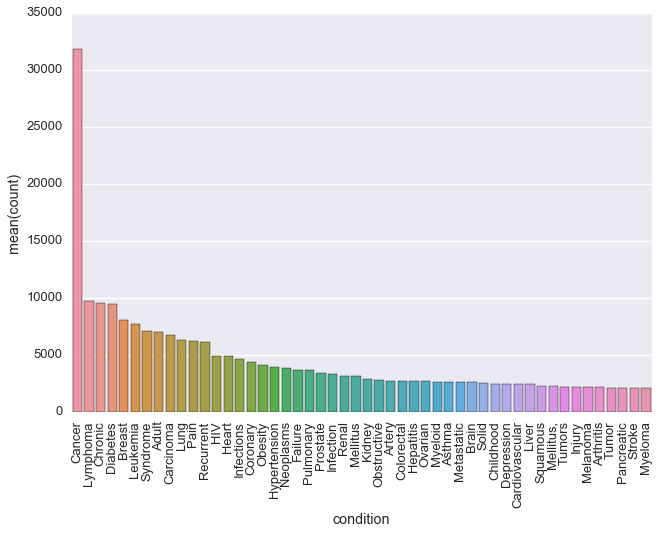

In [65]:
sns.set_context("talk")
sns.barplot(top_cleaned['condition'][0:50], top_cleaned['count'][0:50])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [66]:
# would like to compare numbers of trials vs. population incidence of cancer vs. depression, Arthritis, Stroke, 
# asthma, Hypertension, childhood vs. adult cancers

In [67]:
#http://www.cdc.gov/nchs/fastats/cancer.htm 8.5% of adults who have ever been diagnosed with cancer

In [68]:
top_cleaned[top_cleaned['condition']=='Cancer']

,condition,count,drop_these
0,Cancer,31800,False


In [69]:
31800/340351

0.0934329559777994

In [70]:
#heart disease is actually the leading cause of death (cancer is #2), but not by much http://www.cdc.gov/nchs/fastats/deaths.htm
top_cleaned[top_cleaned['condition']=='Heart']

,condition,count,drop_these
23,Heart,4886,False


In [71]:
4886/340351

0.014355768015959993

In [116]:
#stroke is #4-5 top killer http://www.cdc.gov/nchs/fastats/stroke.htm 2.6%
top_cleaned[top_cleaned['condition']=='Stroke']

,condition,count,drop_these
67,Stroke,2080,False


In [117]:
2080/340351

0.0061113380010636075

In [72]:
#diabetes http://www.cdc.gov/diabetes/statistics/prev/national/figageadult.htm
top_cleaned[top_cleaned['condition']=='Diabetes']

,condition,count,drop_these
7,Diabetes,9429,False


In [105]:
9429/340351

0.02770375289039844

In [106]:
#alzheimer's ~5.4M, total US population: 323,952,889

In [107]:
5400000/323952889

0.016669090424441313

In [108]:
top_cleaned[top_cleaned['condition']=="Alzheimer's"]

,condition,count,drop_these
157,Alzheimer's,899,False


In [110]:
889/340351

0.002612009366800744

In [111]:
#kidney failure ~ 600k
600000/323952889

0.0018521211582712572

In [114]:
top_cleaned[top_cleaned['condition']=='Renal']

,condition,count,drop_these
38,Renal,3167,False


In [115]:
3167/340351

0.009305099735273291

In [73]:
#asthma prevalence is low, e.g. average these: http://www.cdc.gov/asthma/asthmadata.htm

In [74]:
age_pct = (8.6 + 7.4)/2 #lazy way to do this
age_pct

8.0

In [75]:
sex_pct = (6.3 + 9)/2
sex_pct

7.65

In [76]:
race_pct = (7.6 + 9.9 + 6.7)/3
race_pct

8.066666666666666

In [77]:
#% of total trials that have asthma listed in the conditions:
conditions.shape

(340351, 4)

In [118]:
top_cleaned[top_cleaned['condition']=='Alcoholism']

,condition,count,drop_these
522,Alcoholism,249,False


In [120]:
top_cleaned[top_cleaned['condition']=='Addiction']

,condition,count,drop_these
595,Addiction,211,False


In [121]:
top_cleaned[top_cleaned['condition']=='COPD']

,condition,count,drop_these
255,COPD,568,False


In [122]:
568/340351

0.0016688653772135237

In [123]:
top_cleaned[top_cleaned['condition']=='Insomnia']

,condition,count,drop_these
315,Insomnia,448,False


In [125]:
top_cleaned[top_cleaned['condition']=='Acne']

,condition,count,drop_these
369,Acne,381,False


In [78]:
top_cleaned[top_cleaned['condition']=='Asthma']

,condition,count,drop_these
48,Asthma,2590,False


In [79]:
freq = 2590/340351
freq

0.007609791068632089

In [80]:
#arthritis: http://www.cdc.gov/arthritis/data_statistics/index.htm 22.7% of adults
top_cleaned[top_cleaned['condition']=='Arthritis']

,condition,count,drop_these
62,Arthritis,2132,False


In [81]:
freq = 2132/340351
freq

0.006264121451090198

In [82]:
#depression: http://www.cdc.gov/nchs/fastats/depression.htm morbidity 7.6% of 12 years or older
top_cleaned[top_cleaned['condition']=='Depression']

,condition,count,drop_these
53,Depression,2452,False


In [83]:
freq = 2452/340351
freq

0.0072043272974076766

In [84]:
#hypertension: http://www.cdc.gov/nchs/fastats/hypertension.htm 33.5%
top_cleaned[top_cleaned['condition']=='Hypertension']

,condition,count,drop_these
29,Hypertension,3932,False


In [85]:
freq = 3932/34051
freq

0.11547384805145224

In [86]:
#obesity: http://www.cdc.gov/nchs/fastats/obesity-overweight.htm 37.9%
top_cleaned[top_cleaned['condition']=='Obesity']

,condition,count,drop_these
28,Obesity,4126,False


In [87]:
freq = 4126/34051
freq

0.12117118439987078

In [88]:
designs = pd.read_csv('designs.txt', sep='|')
designs.head()

,DESIGN_ID,NCT_ID,DESIGN_NAME,DESIGN_VALUE,MASKED_ROLE
0,234,NCT00000194,Masking,Double-Blind,NaN
1,235,NCT00000194,Primary Purpose,Treatment,NaN
2,236,NCT00000195,Intervention Model,Crossover Assignment,NaN
3,237,NCT00000195,Masking,Double-Blind,NaN
4,238,NCT00000195,Primary Purpose,Treatment,NaN


In [210]:
designs[0:15]

,DESIGN_ID,NCT_ID,DESIGN_NAME,DESIGN_VALUE,MASKED_ROLE
0,234,NCT00000194,Masking,Double-Blind,NaN
1,235,NCT00000194,Primary Purpose,Treatment,NaN
2,236,NCT00000195,Intervention Model,Crossover Assignment,NaN
3,237,NCT00000195,Masking,Double-Blind,NaN
4,238,NCT00000195,Primary Purpose,Treatment,NaN
5,239,NCT00000196,Masking,Double-Blind,NaN
6,240,NCT00000196,Primary Purpose,Treatment,NaN
7,241,NCT00000197,Primary Purpose,Treatment,NaN
8,242,NCT00000198,Primary Purpose,Treatment,NaN
9,243,NCT00000199,Primary Purpose,Treatment,NaN


In [90]:
events = pd.read_csv('reported_event_ctgy.txt', sep='|')
events.head()

/Users/szeitlin/anaconda/envs/clinicaltrials/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,REPORTED_EVENT_CATEGORY_ID,REPORTED_EVENT_ID,CATEGORY_TITLE,CATEGORY_SUB_TITLE,CATEGORY_DESCRIPTION,CATEGORY_ASSESSMENT
0,110,7,Blood and lymphatic system disorders,Amylase,NaN,NaN
1,111,7,Blood and lymphatic system disorders,"Blood,Bone marrow,other",NaN,NaN
2,112,7,Blood and lymphatic system disorders,Fibrinogen,NaN,NaN
3,113,7,Blood and lymphatic system disorders,Hematuria,NaN,NaN
4,114,211,Immune system disorders,Thrombocytopenia,NaN,NaN


In [91]:
counted_events = events.groupby('CATEGORY_TITLE').count().reset_index()

In [92]:
counted_events.head()

,CATEGORY_TITLE,REPORTED_EVENT_CATEGORY_ID,REPORTED_EVENT_ID,CATEGORY_SUB_TITLE,CATEGORY_DESCRIPTION,CATEGORY_ASSESSMENT
0,Blood and lymphatic system disorders,27073,27073,27073,607,170
1,Cardiac disorders,42023,42023,42023,981,149
2,"Congenital, familial and genetic disorders",2084,2084,2084,101,6
3,Ear and labyrinth disorders,6113,6113,6113,80,24
4,Endocrine disorders,3562,3562,3562,125,27


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

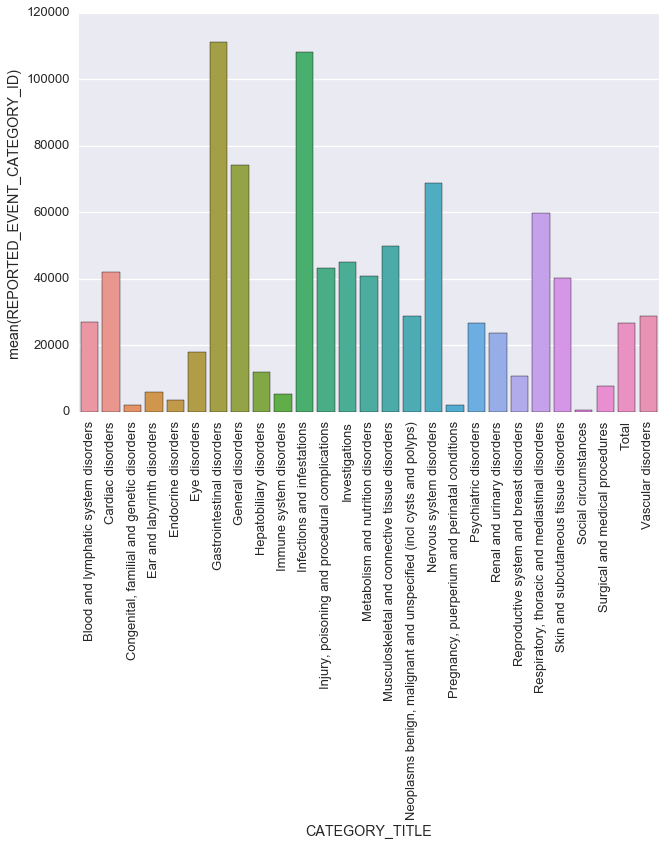

In [93]:
sns.barplot(counted_events['CATEGORY_TITLE'], counted_events['REPORTED_EVENT_CATEGORY_ID'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [94]:
milestones = pd.read_csv('results_partflow_mlstn.txt', sep='|')
milestones.head()

,MILESTONE_ID,PARTICIPANT_FLOW_ID,MILESTONE_TYPE,MILESTONE_TITLE
0,41,81,Milestone,STARTED
1,42,81,Milestone,COMPLETED
2,43,81,Milestone,NOT COMPLETED
3,44,82,Milestone,STARTED
4,45,82,Milestone,COMPLETED


In [95]:
milestone_count = word_counter(milestones['MILESTONE_TITLE'])

In [96]:
mesh_true = pd.Series([True if x in terms else False for x in sorted(milestone_count)])

In [97]:
'Adverse' in terms

False

In [211]:
sorted(milestone_count.items(), key=operator.itemgetter(1), reverse=True)[0:10]

[('COMPLETED', 52282),
 ('NOT', 26143),
 ('STARTED', 26140),
 ('Subject', 9786),
 ('by', 9699),
 ('Withdrawal', 9564),
 ('to', 9368),
 ('Adverse', 8606),
 ('Event', 8554),
 ('Follow-up', 7414)]

In [99]:
words_of_interest = ['COMPLETED', 'Completed', 'completed',
                     'STARTED', 
                     'Adverse', 'adverse', 
                     'Relapse', 'relapse', 'Progression/relapse', 'worsening', 'Recurrent'
                     'Pain', 'Discomfort',
                     'Death', 'death', 'Toxicity','toxicity',
                     'Withdrawal', 'withdrawal', 'withdrew', 'Withdrawn', 'withdrawn',
                     'Discontinuation', 'discontinued',
                     'Exclusion', 'exclusion',
                     'Randomized','randomization', 'Randomised',
                     'Incarcerated', 'incarcerated',
                     'Treated', 'treated', 'TREATED',
                    'Noncompliance', 'non-compliance', 'Non-Compliance', 'non-compliant', 'Non-Compliant',
                     'Poor/non-compliance', 'Poor/Non-Compliance', 'poor/non-compliance',
                     'Ineligible', 'ineligible',
                     'Failure', 'failure', 'Failed', 'failed', 'failures',
                     'Response', 'response', 
                     'Terminated', 'terminated', 'Termination', 'termination', 'Closed/Terminated',
                     'Ongoing', 
                    'Refused', 'Discontinued', 'Declined']

In [212]:
clinical_studies = pd.read_csv('clinical_study_noclob.txt', sep='|', error_bad_lines = False)
clinical_studies.head()

b'Skipping line 33151: expected 42 fields, saw 43\n'
b'Skipping line 59729: expected 42 fields, saw 43\n'
b'Skipping line 137282: expected 42 fields, saw 43\n'
b'Skipping line 210235: expected 42 fields, saw 43\n'
b'Skipping line 254292: expected 42 fields, saw 67\n'


,NCT_ID,DOWNLOAD_DATE,DOWNLOAD_DATE_DT,ORG_STUDY_ID,BRIEF_TITLE,OFFICIAL_TITLE,ACRONYM,SOURCE,HAS_DMC,OVERALL_STATUS,...,FIRSTRECEIVED_DATE,IS_SECTION_801,IS_FDA_REGULATED,WHY_STOPPED,HAS_EXPANDED_ACCESS,FIRSTRECEIVED_RESULTS_DATE,URL,TARGET_DURATION,STUDY_RANK,LIMITATIONS_AND_CAVEATS
0,NCT00000105,ClinicalTrials.gov processed this data on Marc...,03/24/2016,2002LS032,Vaccination With Tetanus and KLH to Assess Imm...,Vaccination With Tetanus Toxoid and Keyhole Li...,NaN,"Masonic Cancer Center, University of Minnesota",Yes,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"- Patients with Cancer (breast, mel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- Transplant patients (umbilical co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,- Patients receiving other cancer v...,November 2012,"November 6, 2012","November 3, 1999",Yes,Yes,Replaced by another study.,No,NaN,https://clinicaltrials.gov/show/NCT00000105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCT00000106,ClinicalTrials.gov processed this data on Marc...,03/24/2016,NCRR-M01RR03186-9943,41.8 Degree Centigrade Whole Body Hyperthermia...,NaN,NaN,National Center for Research Resources (NCRR),NaN,"Active, not recruiting",...,"January 18, 2000",NaN,NaN,NaN,No,NaN,https://clinicaltrials.gov/show/NCT00000106,NaN,211434.0,NaN


In [101]:
clinical_studies.columns

Index(['NCT_ID', 'DOWNLOAD_DATE', 'DOWNLOAD_DATE_DT', 'ORG_STUDY_ID',
       'BRIEF_TITLE', 'OFFICIAL_TITLE', 'ACRONYM', 'SOURCE', 'HAS_DMC',
       'OVERALL_STATUS', 'START_DATE', 'COMPLETION_DATE',
       'COMPLETION_DATE_TYPE', 'PRIMARY_COMPLETION_DATE',
       'PRIMARY_COMPLETION_DATE_TYPE', 'PHASE', 'STUDY_TYPE', 'STUDY_DESIGN',
       'NUMBER_OF_ARMS', 'NUMBER_OF_GROUPS', 'ENROLLMENT_TYPE', 'ENROLLMENT',
       'BIOSPEC_RETENTION', 'BIOSPEC_DESCR', 'GENDER', 'MINIMUM_AGE',
       'MAXIMUM_AGE', 'HEALTHY_VOLUNTEERS', 'SAMPLING_METHOD', 'STUDY_POP',
       'VERIFICATION_DATE', 'LASTCHANGED_DATE', 'FIRSTRECEIVED_DATE',
       'IS_SECTION_801', 'IS_FDA_REGULATED', 'WHY_STOPPED',
       'HAS_EXPANDED_ACCESS', 'FIRSTRECEIVED_RESULTS_DATE', 'URL',
       'TARGET_DURATION', 'STUDY_RANK', 'LIMITATIONS_AND_CAVEATS'],
      dtype='object')

In [229]:
ages = clinical_studies[['MAXIMUM_AGE', 'MINIMUM_AGE']]
ages['MAXIMUM_AGE'].value_counts()[0:5]

65 Years    13981
80 Years    10475
75 Years    10141
70 Years     8650
60 Years     5551
Name: MAXIMUM_AGE, dtype: int64

In [158]:
ages['MINIMUM_AGE'].value_counts()[0:30]

18 Years    126323
20 Years      8500
21 Years      4875
40 Years      4448
50 Years      3491
30 Years      2742
19 Years      2668
16 Years      2613
12 Years      2436
65 Years      1836
6 Years       1816
2 Years       1735
15 Years      1584
60 Years      1575
45 Years      1559
25 Years      1492
35 Years      1405
1 Year        1383
5 Years       1245
13 Years      1152
6 Months      1117
3 Years       1117
10 Years      1073
55 Years      1056
8 Years        997
4 Years        911
14 Years       891
7 Years        852
1 Month        508
70 Years       498
Name: MINIMUM_AGE, dtype: int64

In [213]:
ages.dropna(inplace=True)

In [174]:
max_age_len = pd.Series([len(x) for x in ages['MAXIMUM_AGE']])

In [214]:
ages['max_age_len'] = max_age_len
ages['min_age_len'] = pd.Series([len(x) for x in ages['MINIMUM_AGE']])

In [215]:
ages.describe()

,max_age_len,min_age_len,max_num,min_num
count,37884.000000,13655.000000,37884.000000,37884.000000
mean,8.006784,7.894178,59.678334,19.108938
std,0.230530,0.373630,23.795129,11.413377
min,2.000000,6.000000,1.000000,1.000000
25%,8.000000,NaN,46.000000,18.000000
50%,8.000000,NaN,65.000000,18.000000
75%,8.000000,NaN,75.000000,18.000000
max,26.000000,9.000000,730.000000,510.000000


In [175]:
cleaner = ages[ages['max_age_len'] <= 8]
cleaner2 = ages[ages['min_age_len'] <=10]

In [223]:
#"65 Years"
num = lambda x: int(x.split()[0]) if x.split()[0].isnumeric() else np.nan
unit = lambda x: x.split()[1] if x.split()[0].isnumeric() else np.nan

In [224]:
num('18 Years')

18

In [225]:
num('Both')

nan

In [192]:
ages['MINIMUM_AGE'][0:1].values[0].split()[0]

'18'

In [238]:
ages['MAXIMUM_AGE'] = ages['MAXIMUM_AGE'].astype(str)
ages['MINIMUM_AGE'] = ages['MINIMUM_AGE'].astype(str)

In [239]:
ages['max_num'] = list(map(num, ages['MAXIMUM_AGE']))

In [240]:
ages['min_num'] = list(map(num, ages['MINIMUM_AGE']))

In [241]:
ages['max_unit'] = list(map(unit, ages['MAXIMUM_AGE']))
ages['min_unit'] = list(map(unit, ages['MINIMUM_AGE']))

In [242]:
ages.dropna(inplace=True)

In [243]:
ages.head()

,MAXIMUM_AGE,MINIMUM_AGE,max_num,min_num,max_unit,min_unit
4,65 Years,18 Years,65.0,18.0,Years,Years
5,60 Years,17 Years,60.0,17.0,Years,Years
6,65 Years,50 Years,65.0,50.0,Years,Years
7,35 Years,14 Years,35.0,14.0,Years,Years
13,80 Years,50 Years,80.0,50.0,Years,Years


In [248]:
ages.groupby(['min_unit', 'max_unit']).mean().round()

max_num  min_num
min_unit max_unit                  
Days     Days        172.0     81.0
         Months       27.0     68.0
         Years        24.0     80.0
Month    Months       22.0      1.0
         Weeks        28.0      1.0
         Year          1.0      1.0
         Years        20.0      1.0
Months   Months       35.0     12.0
         Year          1.0      4.0
         Years        20.0      8.0
Weeks    Days        167.0      6.0
         Months       18.0      8.0
         Weeks        26.0     19.0
         Year          1.0     24.0
         Years        18.0     14.0
Year     Months       30.0      1.0
         Year          1.0      1.0
         Years        24.0      1.0
Years    Months      128.0      7.0
         Years        62.0     20.0

In [149]:
specimens = clinical_studies[['BIOSPEC_RETENTION', 'BIOSPEC_DESCR']]
samples = specimens['BIOSPEC_RETENTION'].value_counts()[0:3]

[None, None, None, None, None, None, None]

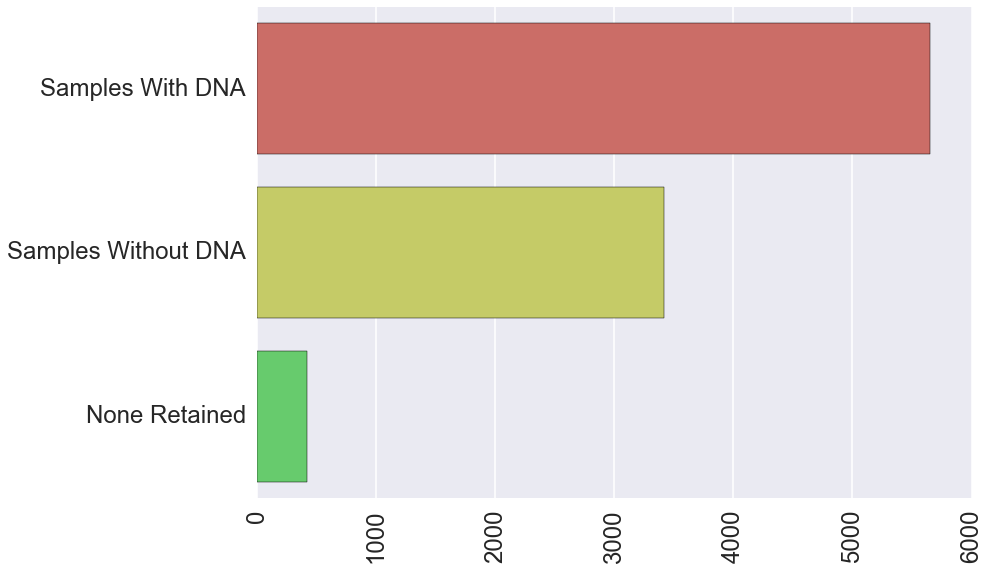

In [150]:
get_x = lambda x: x[0]
get_y = lambda x: x[1]
x_labels = samples.index
y_labels = samples.values
sns.set_context("poster", font_scale = 1.5)
sns.set_palette("hls")
sns.barplot(y_labels, x_labels)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [142]:
genders = clinical_studies['GENDER'].value_counts()[0:3]
genders.values

array([175975,  20021,  10728])

[None, None, None, None, None, None, None, None, None, None]

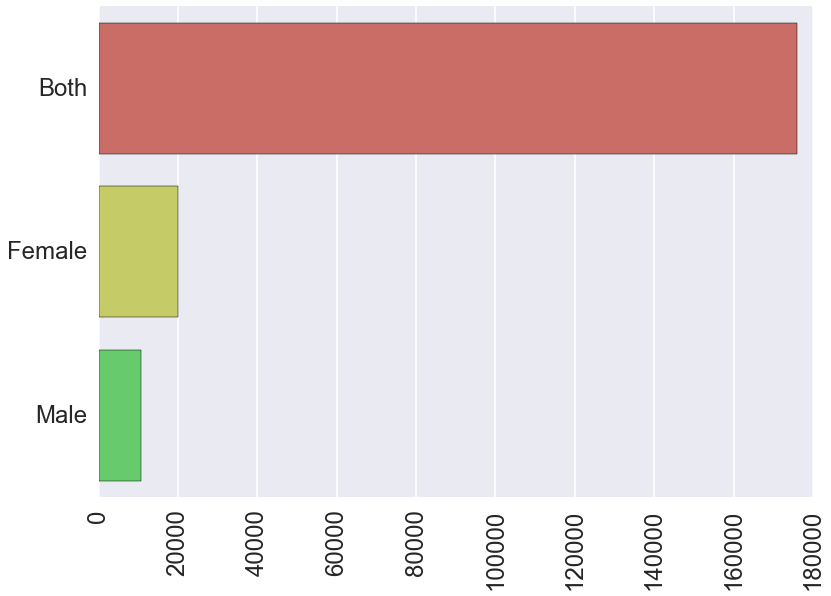

In [146]:
get_x = lambda x: x[0]
get_y = lambda x: x[1]
x_labels = genders.index
y_labels = genders.values
sns.set_context("poster", font_scale = 1.5)
sns.set_palette("hls")
sns.barplot(y_labels, x_labels)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [102]:
baseline = pd.read_csv('results_baseline_measure_catgy.txt', sep='|')
baseline.head()

/Users/szeitlin/anaconda/envs/clinicaltrials/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BASELINE_MEASURE_CATGY_ID,BASELINE_ID,CATEGORY_TITLE,ARM_GROUP_ID,BASELINE_VALUE,SPREAD,LOWER_LIMIT,UPPER_LIMIT
0,116,141,Black,337293,10,NaN,NaN,NaN
1,117,142,United States,337293,215,NaN,NaN,NaN
2,118,143,NaN,337294,9968,NaN,NaN,NaN
3,119,144,<=18 years,337294,0,NaN,NaN,NaN
4,120,144,Between 18 and 65 years,337294,8981,NaN,NaN,NaN


In [103]:
baseline_measure = pd.read_csv('results_baseline_measure.txt', sep='|')
baseline_measure.head()

,BASELINE_ID,RSLTS_BASELINE_ID,BASELINE_MEASURE_TITLE,DESCRIPTION,UNITS_OF_MEASURE,MEASURE_TYPE,DISPERSION
0,91,30,Gender,NaN,participants,Number,NaN
1,92,30,Region of Enrollment,NaN,participants,Number,NaN
2,93,31,Number of Participants,NaN,participants,Number,NaN
3,94,31,Age,NaN,years,Median,Full Range
4,95,31,Gender,NaN,participants,Number,NaN


In [104]:
measured = baseline.merge(baseline_measure, how='left', on='BASELINE_ID')
measured.head()

,BASELINE_MEASURE_CATGY_ID,BASELINE_ID,CATEGORY_TITLE,ARM_GROUP_ID,BASELINE_VALUE,SPREAD,LOWER_LIMIT,UPPER_LIMIT,RSLTS_BASELINE_ID,BASELINE_MEASURE_TITLE,DESCRIPTION,UNITS_OF_MEASURE,MEASURE_TYPE,DISPERSION
0,116,141,Black,337293,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117,142,United States,337293,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118,143,NaN,337294,9968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,144,<=18 years,337294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120,144,Between 18 and 65 years,337294,8981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
